Stationarity Tests

In [1]:
# ADF test is a very popular test for stationarity, However some time series passes the ADF test without being stationary, KPSS is another test for checking the stationarity of a time series. It is prudent to apply both tests, so that it can be ensured that the series is truly stationarity. Next to that, we cannot forget teh importance of also observing the time series plot.



# ADF test is used to determine the presence of unit root in the series and hence helps understanding if the series is stationary or not. The null and alternate hypothesis of this test are:



# Null Hypothesis: The series has a unit root, meaning it is non-stationary. It has some time dependent structure.

# Alternate Hypothesis: The series has no unit root, meaning it is stationary. It does not have time dependent structure.


# If the null hypothesis failed to be rejected, this test may provide evidence that the series is non-stationary..

# A p-value below 0.05 suggests we reject the null hypothesis. Otherwise a p-value above the threshold suggests we fail to reject the null hepothesis

In [2]:
import numpy as np
import pandas as pd

We load the data about the pm2.5 for the year 2022 for the city of New Delhi

In [3]:
raw_data = pd.read_csv('NewDelhi_PM2.5_2022_YTD.csv')

In [4]:
raw_data.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2022-01-01 02:00 AM,2022,1,1,2,262.5,313,Hazardous,269.0,UG/M3,1 Hr,Valid
1,New Delhi,PM2.5 - Principal,2022-01-01 03:00 AM,2022,1,1,3,255.3,306,Hazardous,248.0,UG/M3,1 Hr,Valid
2,New Delhi,PM2.5 - Principal,2022-01-01 04:00 AM,2022,1,1,4,252.1,303,Hazardous,249.0,UG/M3,1 Hr,Valid
3,New Delhi,PM2.5 - Principal,2022-01-01 05:00 AM,2022,1,1,5,231.3,281,Very Unhealthy,205.0,UG/M3,1 Hr,Valid
4,New Delhi,PM2.5 - Principal,2022-01-01 06:00 AM,2022,1,1,6,222.6,272,Very Unhealthy,195.0,UG/M3,1 Hr,Valid


We check for the null values if any

In [5]:
raw_data.isna().sum()
# there are 30 nos null values for the AQI Category.


Site              0
Parameter         0
Date (LT)         0
Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI               0
AQI Category     39
Raw Conc.         0
Conc. Unit        0
Duration          0
QC Name           0
dtype: int64

In [8]:
data_1 = raw_data[["Date (LT)", "AQI"]]

In [19]:
data_1.rename(columns={"Date (LT)" : "Date"}, inplace=True)

/tmp/ipykernel_22489/4148393300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.rename(columns={"Date (LT)" : "Date"}, inplace=True)


In [23]:
data_1["Date"] =  pd.to_datetime(data_1["Date"])

0      2022-01-01 02:00:00
1      2022-01-01 03:00:00
2      2022-01-01 04:00:00
3      2022-01-01 05:00:00
4      2022-01-01 06:00:00
               ...        
8146   2022-12-31 21:00:00
8147   2022-12-31 22:00:00
8148   2022-12-31 23:00:00
8149   2023-01-01 00:00:00
8150   2023-01-01 01:00:00
Name: Date, Length: 8151, dtype: datetime64[ns]

In [24]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8151 entries, 0 to 8150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8151 non-null   datetime64[ns]
 1   AQI     8151 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 127.5 KB


In [ ]:
import statsmodels.api as sm

decomposition  = sm.tsa.seasonal_decompose(diet['diet'])

## Forecasting with Facebook Prophet

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [6]:
df_store_7_item_28 = pd.read_csv('sales_store_item_28.csv')
df_store_7_item_28.head()   #d ate and sales as columns

,date,sales
0,2013-01-01,7
1,2013-01-02,4
2,2013-01-03,8
3,2013-01-04,7
4,2013-01-05,8


In [7]:
df_store_7_item_28.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1258 non-null   object
 1   sales   1258 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.8+ KB


In [8]:
# Visualize the data 


df_store_7_item_28['date'] = pd.to_datetime(df_store_7_item_28['date'])

In [11]:
df_store_7_item_28_time = df_store_7_item_28.set_index('date')
df_store_7_item_28_time.head() # date as index and sales as single column

,sales
date,
2013-01-01,7
2013-01-02,4
2013-01-03,8
2013-01-04,7
2013-01-05,8


<Axes: xlabel='date'>

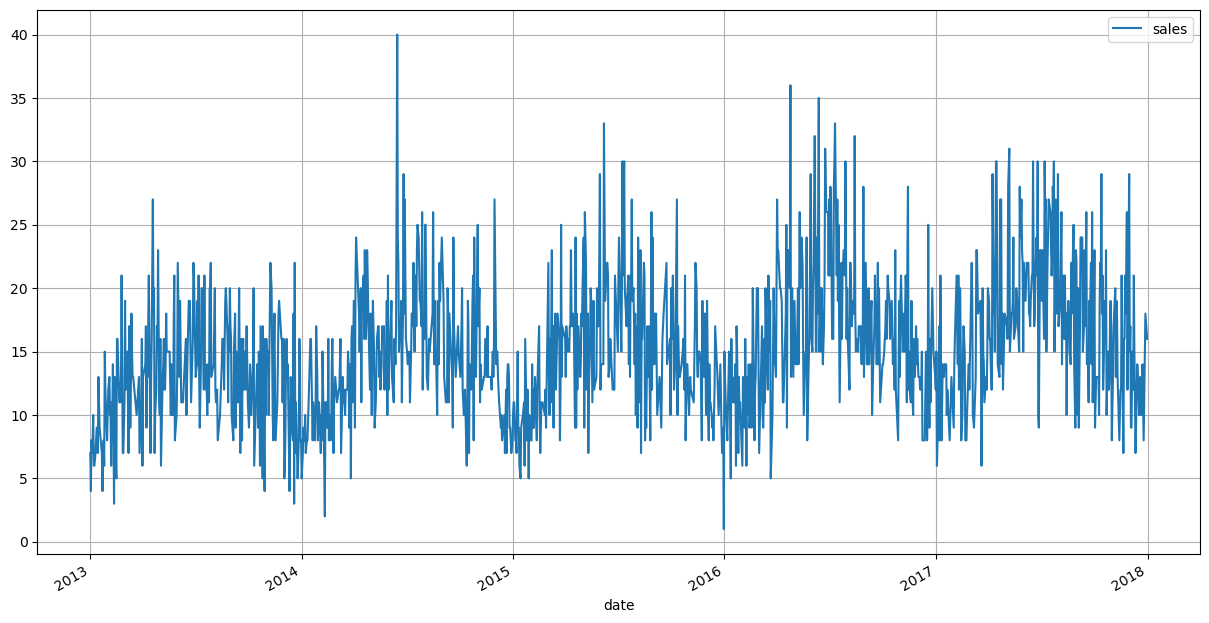

In [13]:
df_store_7_item_28_time.plot(grid=True, figsize=(15,8))

<Axes: xlabel='date'>

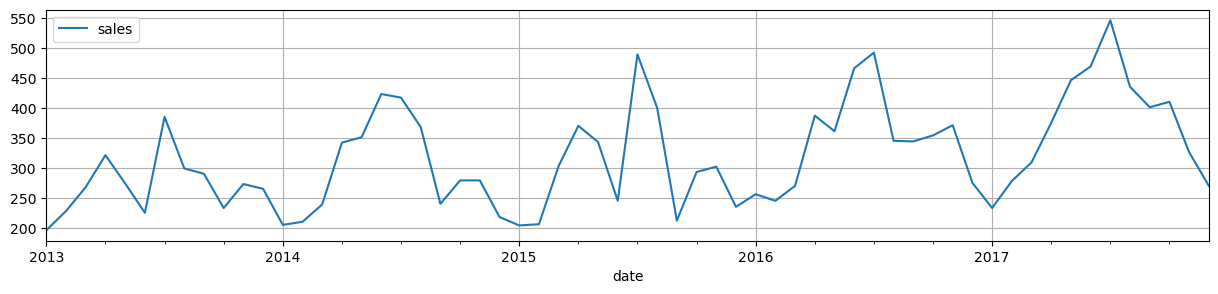

In [24]:
df_store_7_item_28_time.resample('M').sum().plot(grid=True, figsize=(15,3))

<Axes: xlabel='date'>

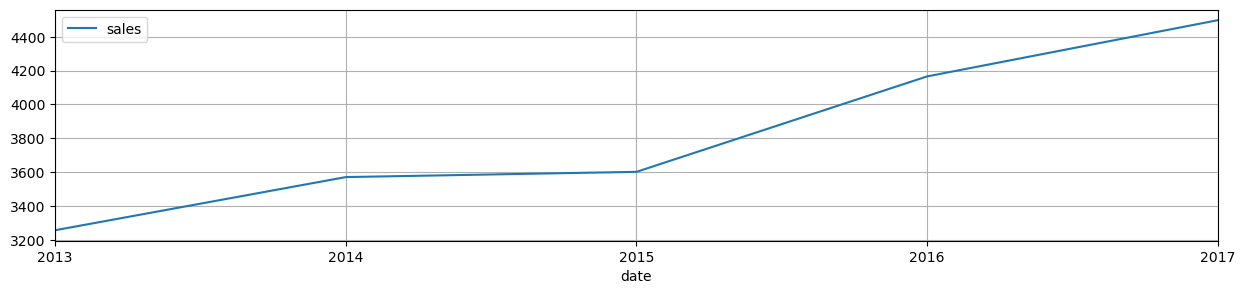

In [25]:
df_store_7_item_28_time.resample('A').sum().plot(grid=True, figsize=(15,3))

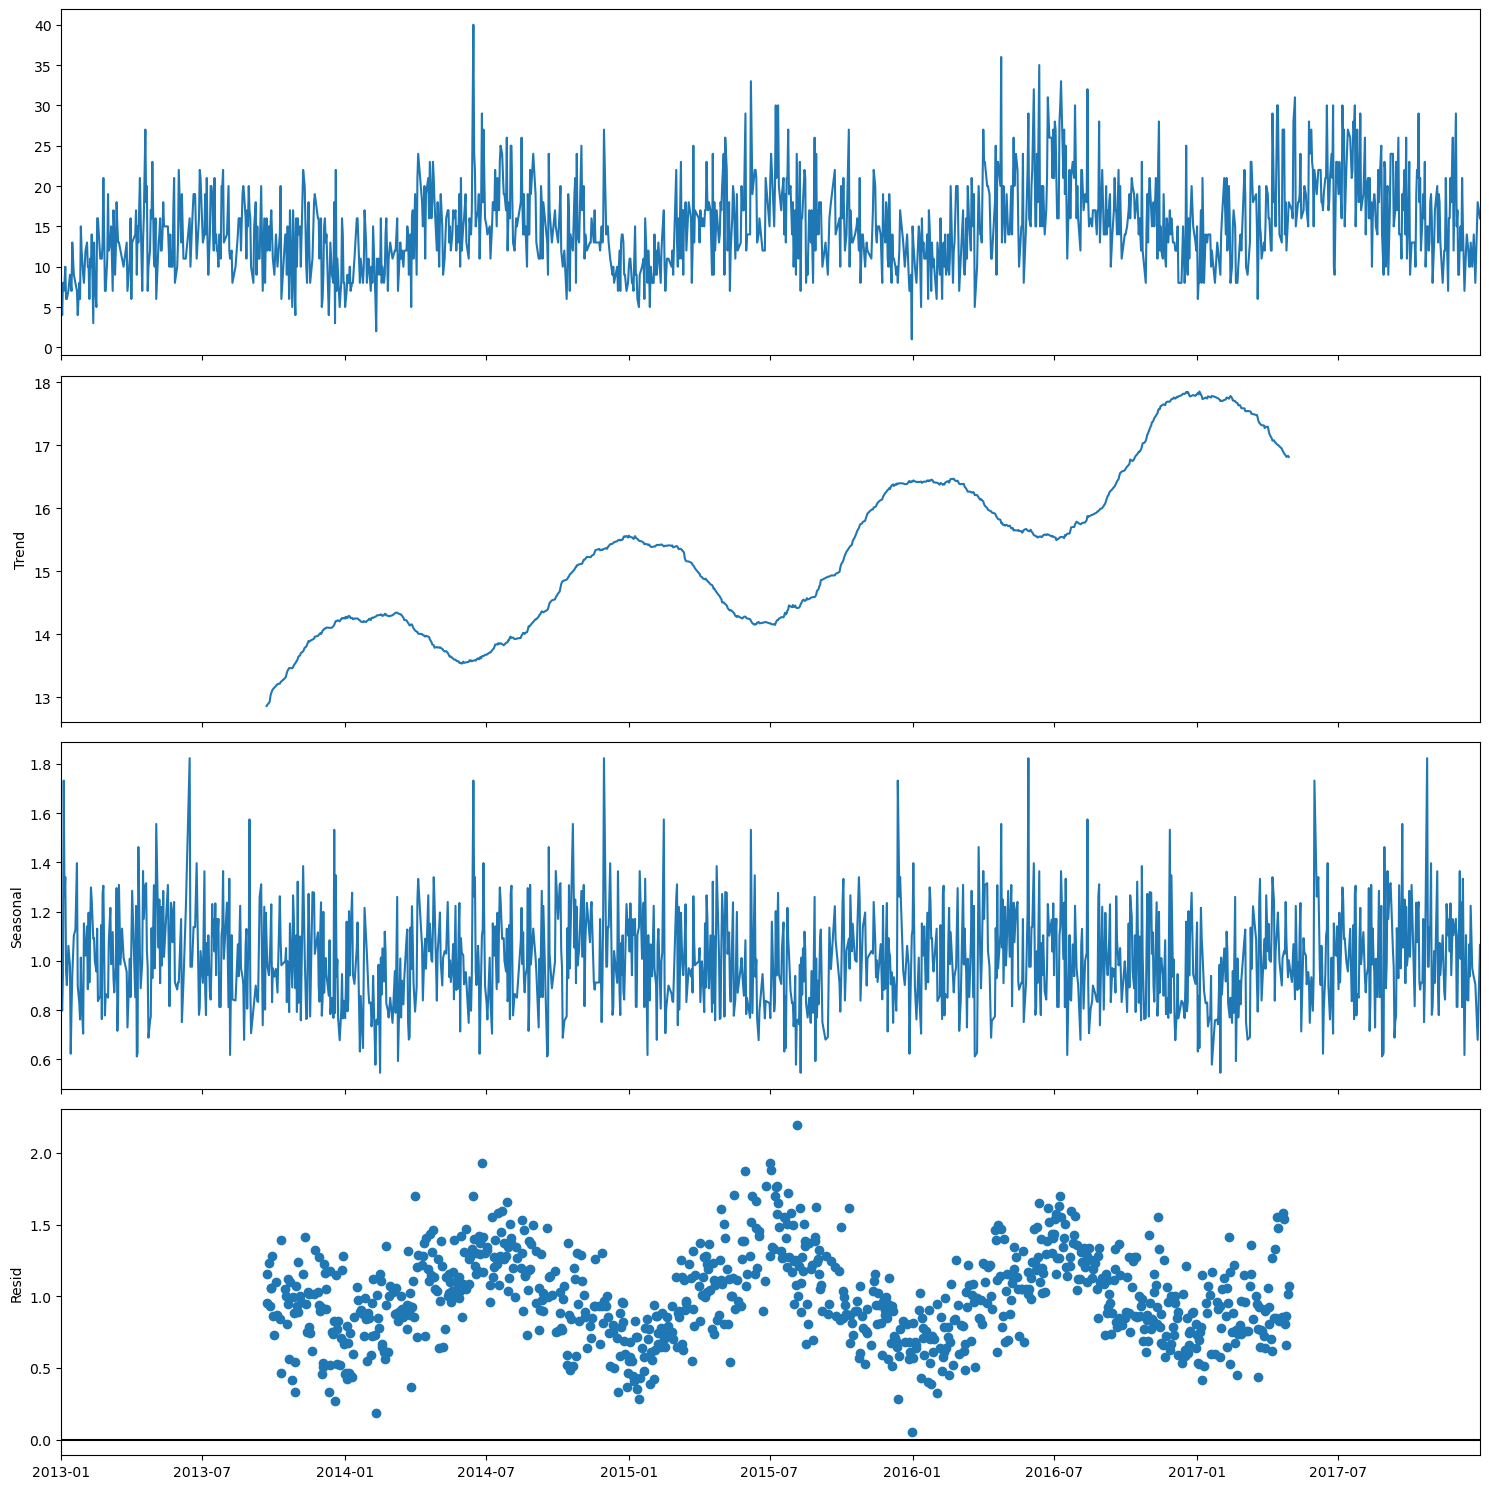

In [33]:
plt.rcParams['figure.figsize'] = 15,15

decomposition  =  sm.tsa.seasonal_decompose(df_store_7_item_28_time,
                                      model='multiplicative',
                                      period=365)

fig  = decomposition.plot()
plt.show()

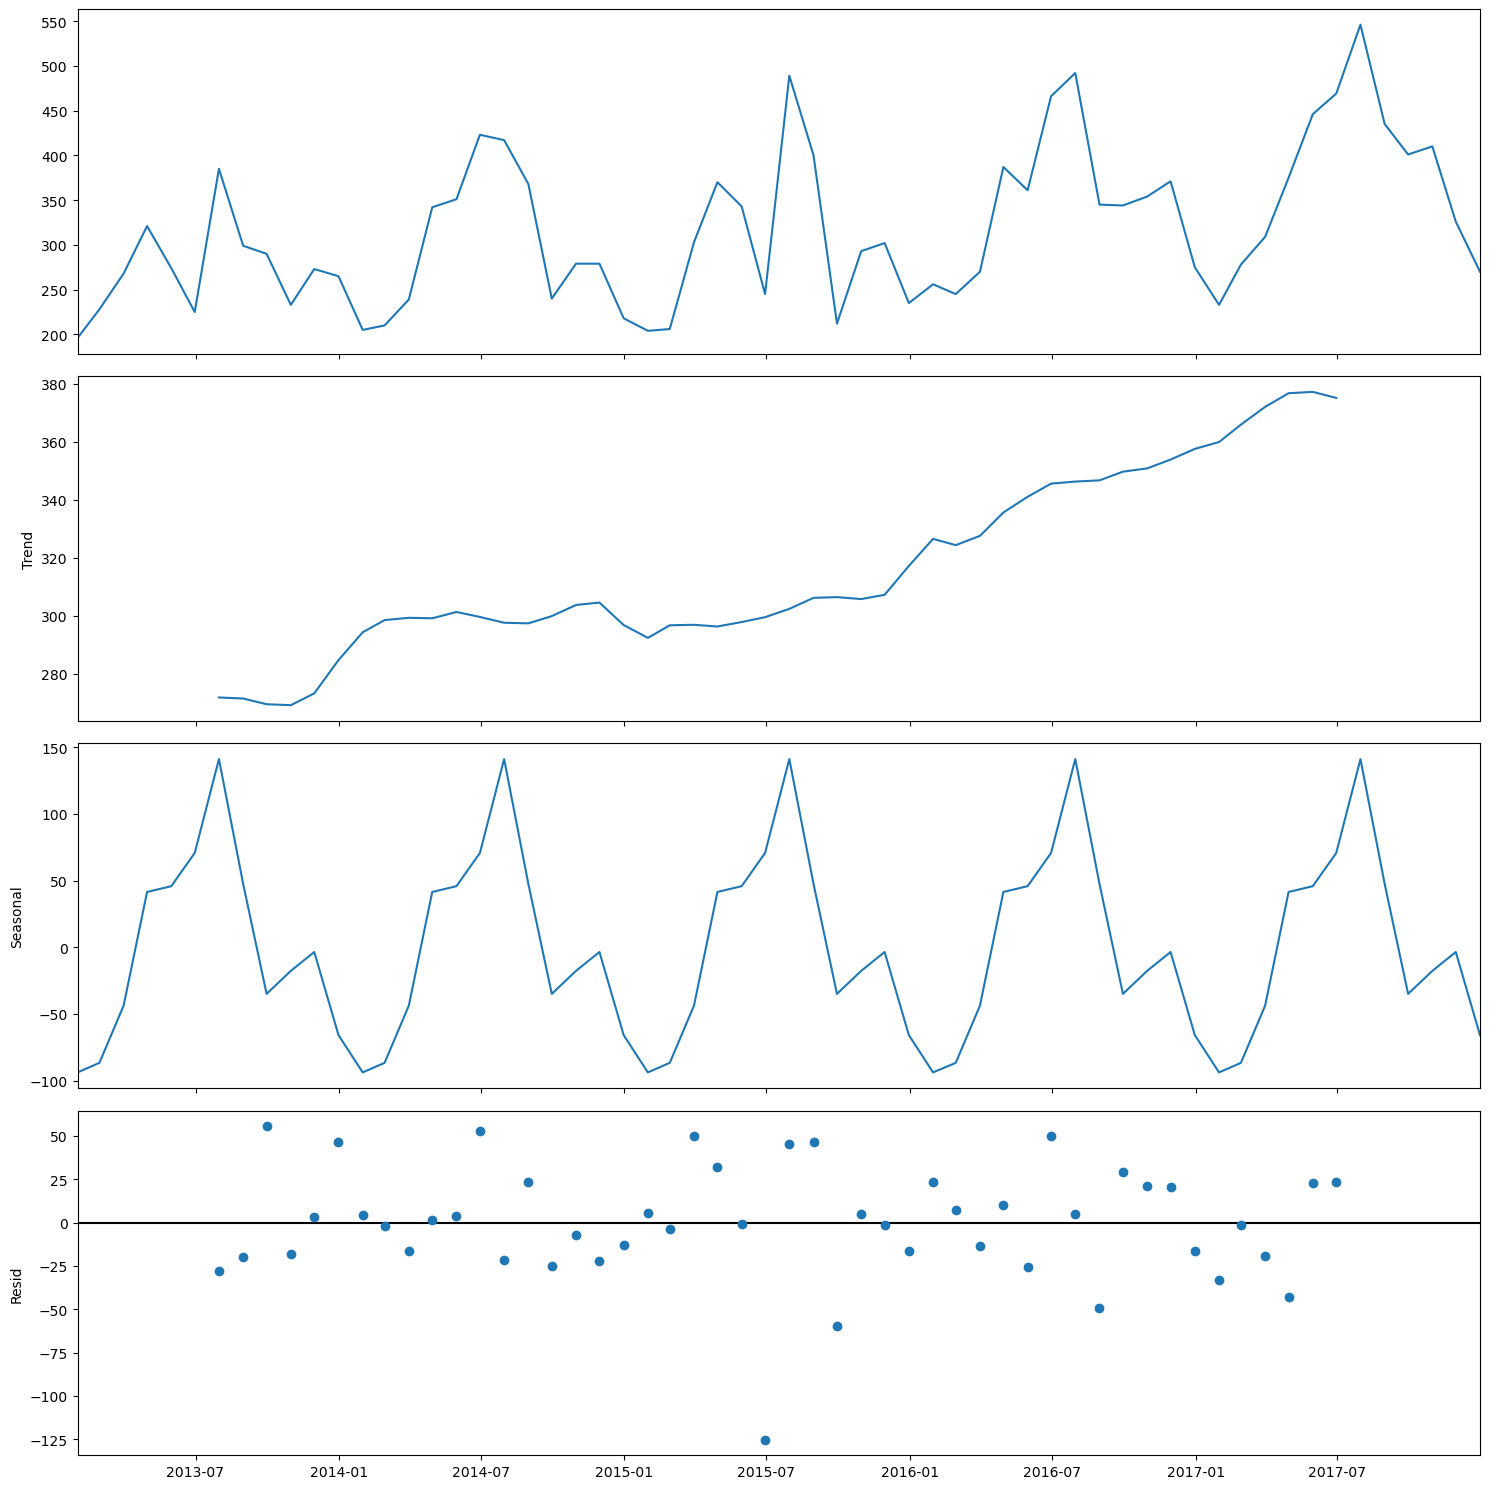

In [41]:
decomposition  =  sm.tsa.seasonal_decompose(df_store_7_item_28_time.resample('M').sum(),
                                      model='additive',
                                      period=12)

fig  = decomposition.plot()
plt.show()

In [43]:
# Forecasting with Prophet


df_store_7_item_28.columns  = ['ds','y']
df_store_7_item_28.head()

,ds,y
0,2013-01-01,7
1,2013-01-02,4
2,2013-01-03,8
3,2013-01-04,7
4,2013-01-05,8


In [44]:
m = Prophet(interval_width=0.95)
model = m.fit(df_store_7_item_28)

20:59:06 - cmdstanpy - INFO - Chain [1] start processing
20:59:06 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
1343,2018-03-27
1344,2018-03-28
1345,2018-03-29
1346,2018-03-30
1347,2018-03-31


In [48]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,12.449240,-1.214857,13.981252,12.449240,12.449240,-6.286371,-6.286371,-6.286371,-1.374306,-1.374306,-1.374306,-4.912065,-4.912065,-4.912065,0.0,0.0,0.0,6.162869
1,2013-01-02,12.452355,-0.751690,14.507006,12.452355,12.452355,-5.450502,-5.450502,-5.450502,-0.510088,-0.510088,-0.510088,-4.940414,-4.940414,-4.940414,0.0,0.0,0.0,7.001853
2,2013-01-03,12.455471,-1.048617,14.713718,12.455471,12.455471,-5.044846,-5.044846,-5.044846,-0.082151,-0.082151,-0.082151,-4.962695,-4.962695,-4.962695,0.0,0.0,0.0,7.410624
3,2013-01-04,12.458586,-0.131372,16.108134,12.458586,12.458586,-4.389179,-4.389179,-4.389179,0.588642,0.588642,0.588642,-4.977821,-4.977821,-4.977821,0.0,0.0,0.0,8.069407
4,2013-01-05,12.461701,1.800301,16.229151,12.461701,12.461701,-3.395804,-3.395804,-3.395804,1.588994,1.588994,1.588994,-4.984797,-4.984797,-4.984797,0.0,0.0,0.0,9.065897


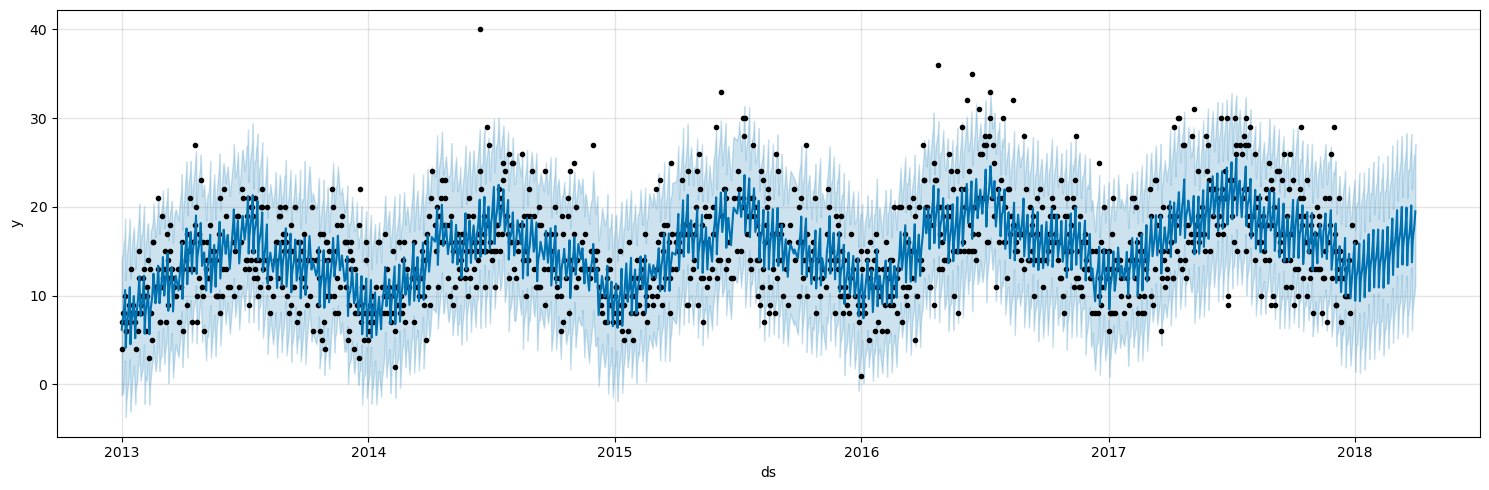

In [54]:
# Forecast plot

plot1 = m.plot(forecast, figsize=(15,5))

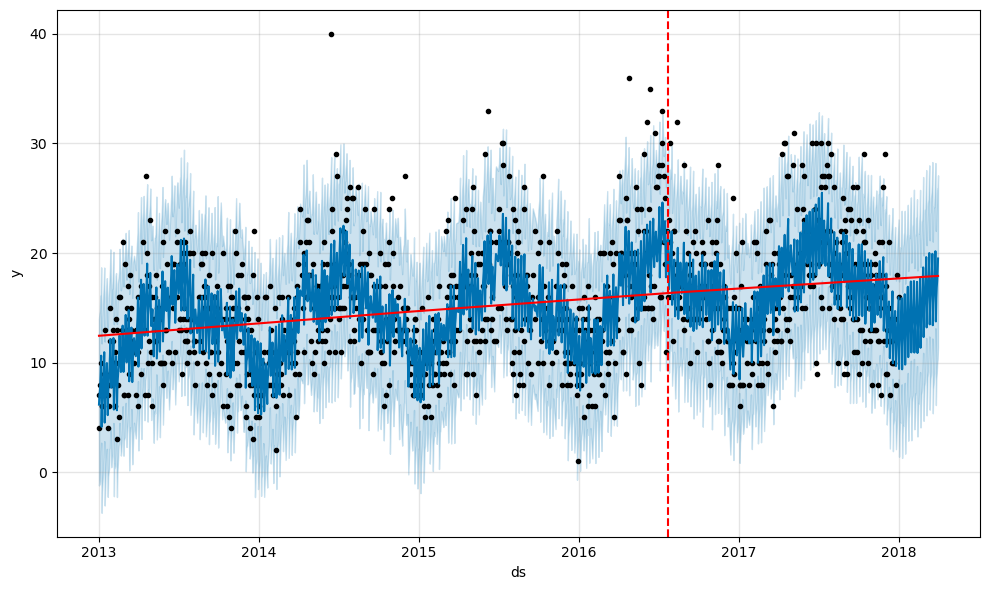

In [55]:
from prophet.plot import add_changepoints_to_plot

plot1 = m.plot(forecast)
a = add_changepoints_to_plot(plot1.gca(),m,forecast)

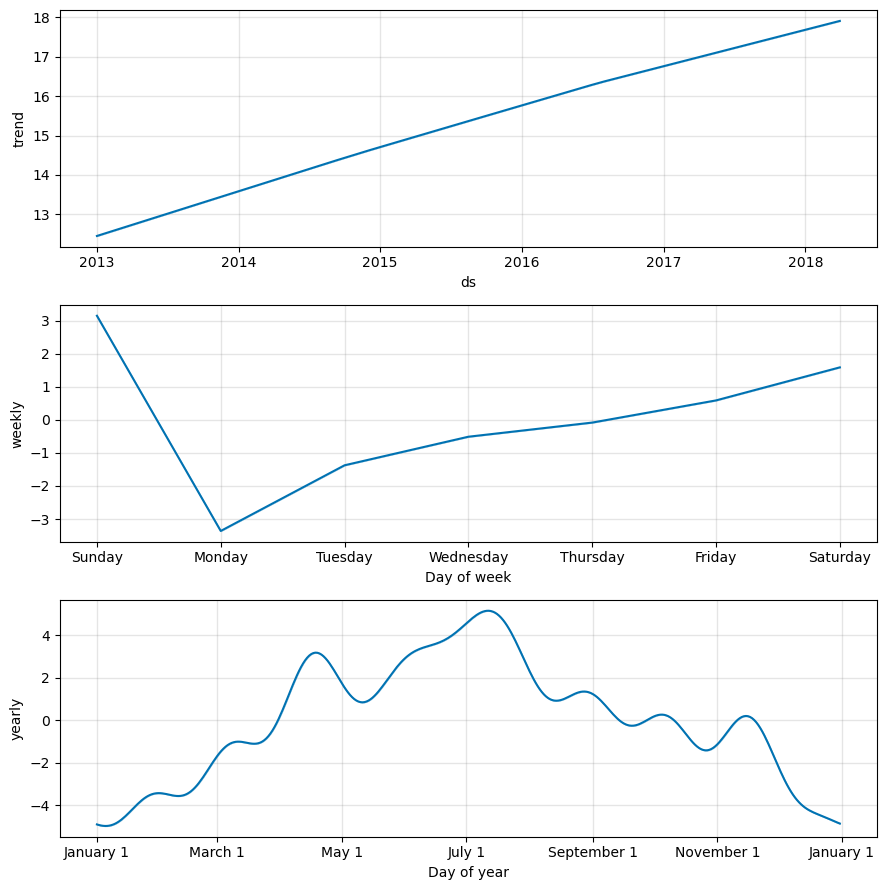

In [56]:
plots2 = m.plot_components(forecast)

In [59]:
# Evaluate the model

df_merge = pd.merge(df_store_7_item_28, forecast[['ds','yhat_lower','yhat_upper','yhat']], on='ds')

df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.tail()

,ds,yhat_lower,yhat_upper,yhat,y
1253,2017-12-21,4.877627,20.816951,13.110781,10
1254,2017-12-23,6.572214,22.376233,14.708908,14
1255,2017-12-25,2.096289,17.490508,9.682638,8
1256,2017-12-28,5.365441,20.582540,12.843644,18
1257,2017-12-31,8.479441,23.069490,15.964158,16


In [60]:
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_01)


MAE: 3.107


In [62]:
mape01 = mean_absolute_percentage_error(y_true,y_pred)
print('MAPE: %.3f' % mape01 )

MAPE: 0.243


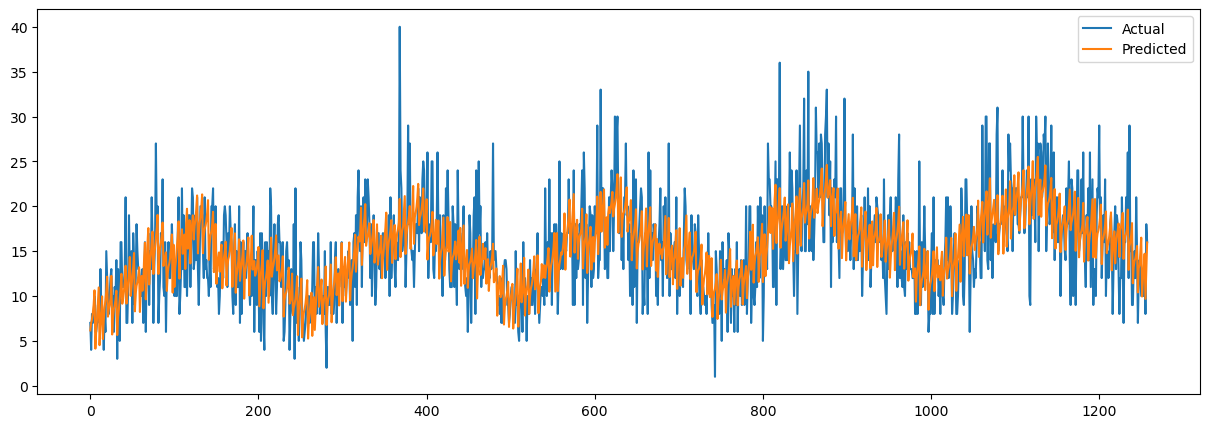

In [65]:
plt.rcParams['figure.figsize'] = 15,5

plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [70]:
# Prophet's diagnostic tools

from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, horizon='90 days')
df_cv.head()

  0%|          | 0/31 [00:00<?, ?it/s]21:31:41 - cmdstanpy - INFO - Chain [1] start processing
21:31:41 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 1/31 [00:00<00:21,  1.40it/s]21:31:42 - cmdstanpy - INFO - Chain [1] start processing
21:31:42 - cmdstanpy - INFO - Chain [1] done processing
  6%|▋         | 2/31 [00:00<00:11,  2.60it/s]21:31:42 - cmdstanpy - INFO - Chain [1] start processing
21:31:42 - cmdstanpy - INFO - Chain [1] done processing
 10%|▉         | 3/31 [00:01<00:07,  3.65it/s]21:31:42 - cmdstanpy - INFO - Chain [1] start processing
21:31:42 - cmdstanpy - INFO - Chain [1] done processing
 13%|█▎        | 4/31 [00:01<00:05,  4.58it/s]21:31:42 - cmdstanpy - INFO - Chain [1] start processing
21:31:42 - cmdstanpy - INFO - Chain [1] done processing
 16%|█▌        | 5/31 [00:01<00:04,  5.23it/s]21:31:42 - cmdstanpy - INFO - Chain [1] start processing
21:31:42 - cmdstanpy - INFO - Chain [1] done processing
 19%|█▉        | 6/31 [00:01<00:04,  5.59it/s]21:31:42

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-24,13.558660,7.245048,20.456838,8,2014-01-21
1,2014-01-25,15.334706,8.539382,21.621437,10,2014-01-21
2,2014-01-26,15.951838,9.949485,22.414823,17,2014-01-21
3,2014-01-28,11.628085,4.464829,18.328183,13,2014-01-21
4,2014-01-29,12.707963,6.251546,19.681556,8,2014-01-21


In [73]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
77,86 days,17.131595,4.139033,3.282599,0.275700,0.178519,0.214809,0.927574
78,87 days,17.409360,4.172453,3.328774,0.266703,0.182054,0.216843,0.927574
79,88 days,16.773786,4.095581,3.249173,0.228635,0.178373,0.208507,0.935124
80,89 days,16.440311,4.054665,3.238985,0.228838,0.178373,0.208004,0.937958
81,90 days,16.975957,4.120189,3.293116,0.233069,0.183727,0.210708,0.927356


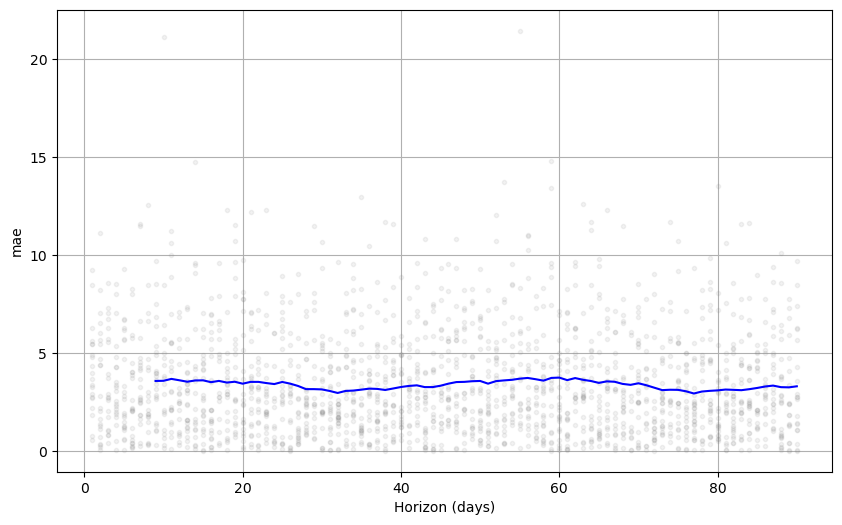

In [74]:
from prophet.plot import plot_cross_validation_metric
plot3 = plot_cross_validation_metric(df_cv, metric='mae')

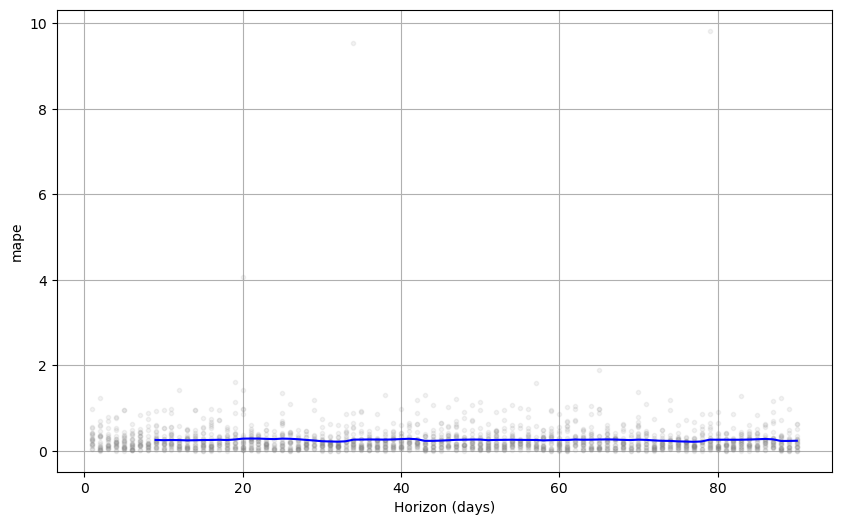

In [75]:
plot4 = plot_cross_validation_metric(df_cv, metric='mape')